# Create figure of timeline of data collection and definition of prodromal group

In [2]:
import numpy as np
import pandas as pd

import pylab as plt
import seaborn as sns

from scipy import stats
from statannot import add_stat_annotation

from importlib import reload
import sys
import os
sys.path.insert(1,'../')
import plots

In [3]:
reload(plots)
image_path = plots.set_dir()
colors = plots.set_colors()

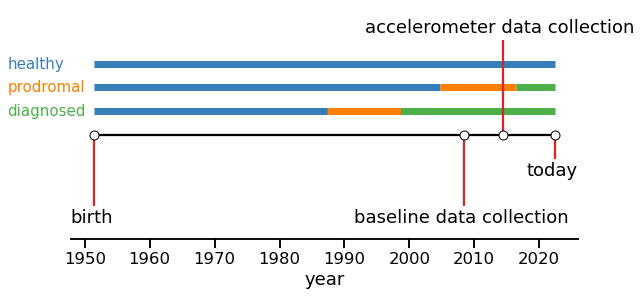

In [24]:
import datetime
import matplotlib.dates as mdates

names = ['birth','baseline data collection','accelerometer data collection','today']

dates = [0,57,62.5,89]
dates = pd.to_datetime(['1951-06-15','2008-06-15','2014-06-15','2022-6-15'])

# Choose some nice levels
levels = np.tile([-3, -3, 4, -1, 2],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
plots.plot_context()
#ax.set(title="Timeline of data collection")
ax.hlines(3, dates[0],dates[-1],color=colors.healthy,linewidths=7)
ax.text(dates[0]-datetime.timedelta(weeks=700),3,'healthy',ha='left',va='center',fontsize=15,color=colors.healthy)
#ax.hlines(1, 62.58,100,color="tab:green",linewidths=7)  # prevalent
ax.hlines(1, dates[0],dates[1]-datetime.timedelta(weeks=104),color=colors.healthy,linewidths=7)
ax.hlines(1, dates[1]-datetime.timedelta(weeks=1104),dates[1]-datetime.timedelta(weeks=504),color=colors.prodromal,linewidths=7) 
ax.hlines(1, dates[1]-datetime.timedelta(weeks=504),dates[-1],color=colors.diseased,linewidths=7) 
ax.text(dates[0]-datetime.timedelta(weeks=700),1,'diagnosed',ha='left',va='center',fontsize=15,color=colors.diseased)

#ax.hlines(2, 73.58,100,color="tab:orange",linewidths=7) # incident
ax.hlines(2, dates[0],dates[2]-datetime.timedelta(weeks=504),color=colors.healthy,linewidths=7)
ax.hlines(2, dates[2]-datetime.timedelta(weeks=504),dates[2]+datetime.timedelta(weeks=104),color=colors.prodromal,linewidths=7)
ax.hlines(2, dates[2]+datetime.timedelta(weeks=104),dates[-1],color=colors.diseased,linewidths=7)
ax.text(dates[0]-datetime.timedelta(weeks=700),2,'prodromal',ha='left',va='center',fontsize=15,color=colors.prodromal)
#ax.vlines(70.3, -3, 4, color="k",linestyle='--')  # The vertical stems.
ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
#ax.set_xticklabels(dates_labels)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# remove y axis and spines
ax.yaxis.set_visible(False)
#ax.xaxis.set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('year',fontsize=18)

ax.margins(y=0.2)
plt.savefig(f'{image_path}/schematic_timeline_dates.pdf',bbox_inches='tight',dpi=300,transparent=True)
plt.savefig(f'{image_path}/schematic_timeline_dates.png',bbox_inches='tight',dpi=300,transparent=True)

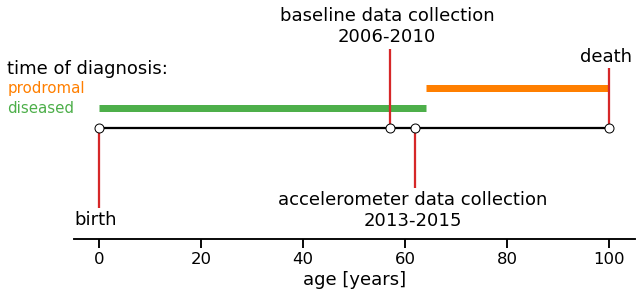

In [26]:
from datetime import datetime
import matplotlib.dates as mdates

names = ['birth','baseline data collection\n2006-2010','accelerometer data collection\n2013-2015','death']

dates = [0,57,62,100]

# Choose some nice levels
levels = np.tile([-4, 4, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
plots.plot_context()
#ax.set(title="Timeline of data collection")

#ax.hlines(1, 62.58,100,color="tab:green",linewidths=7)  # prevalent
ax.hlines(1, 0,64,color=colors.diseased,linewidths=7) 
ax.text(-18,1,'diseased',ha='left',va='center',fontsize=15,color=colors.diseased)

#ax.hlines(2, 73.58,100,color="tab:orange",linewidths=7) # incident
ax.hlines(2, 64,100,color=colors.prodromal,linewidths=7)
ax.text(-18,2,'prodromal',ha='left',va='center',fontsize=15,color=colors.prodromal)
ax.text(-18,3,'time of diagnosis:',ha='left',va='center')
#ax.vlines(70.3, -3, 4, color="k",linestyle='--')  # The vertical stems.
ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# remove y axis and spines
ax.yaxis.set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('age [years]',fontsize=18)

ax.margins(y=0.2)
plt.savefig(f'{image_path}/schematic_timeline.pdf',bbox_inches='tight',dpi=200)